LOAN PREDICTION AI MODEL


<ipython-input-5-b61a6d0056cd>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[col].fillna(combined_df[col].mode()[0], inplace=True)
<ipython-input-5-b61a6d0056cd>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

Decision Tree Accuracy: 0.7073170731707317
Random Forest Accuracy: 0.7560975609756098

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



<ipython-input-5-b61a6d0056cd>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Loan_Status', palette='Set2')


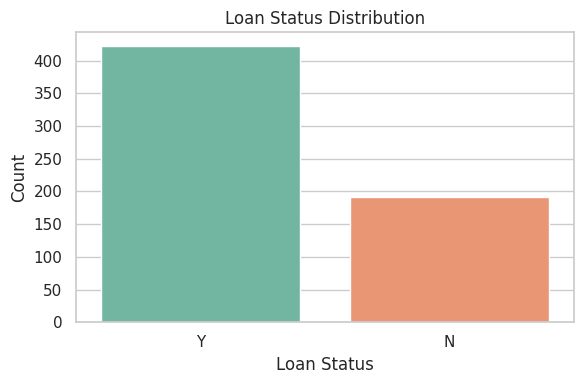

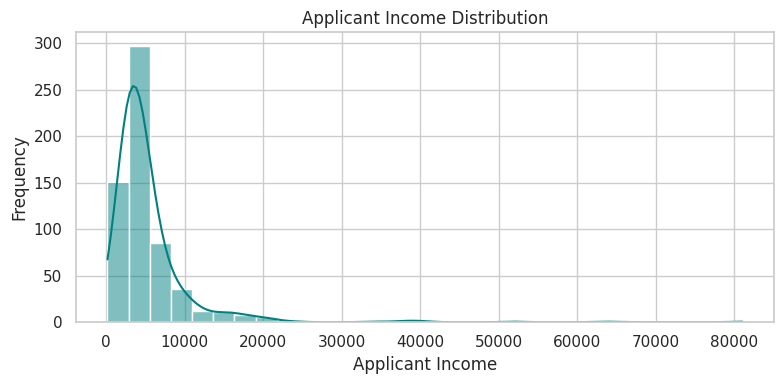

<ipython-input-5-b61a6d0056cd>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Loan_Status', y='LoanAmount', palette='coolwarm')


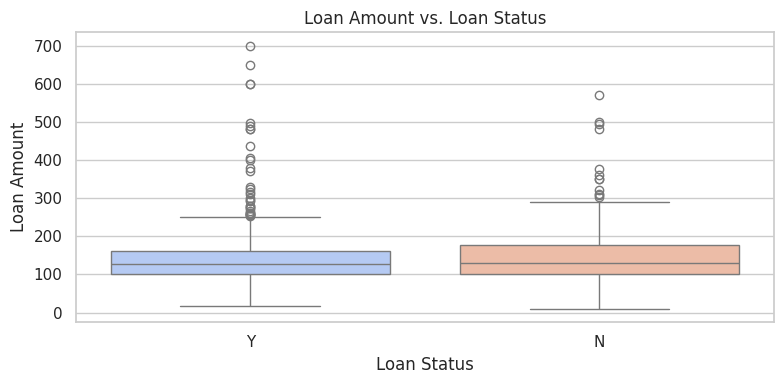

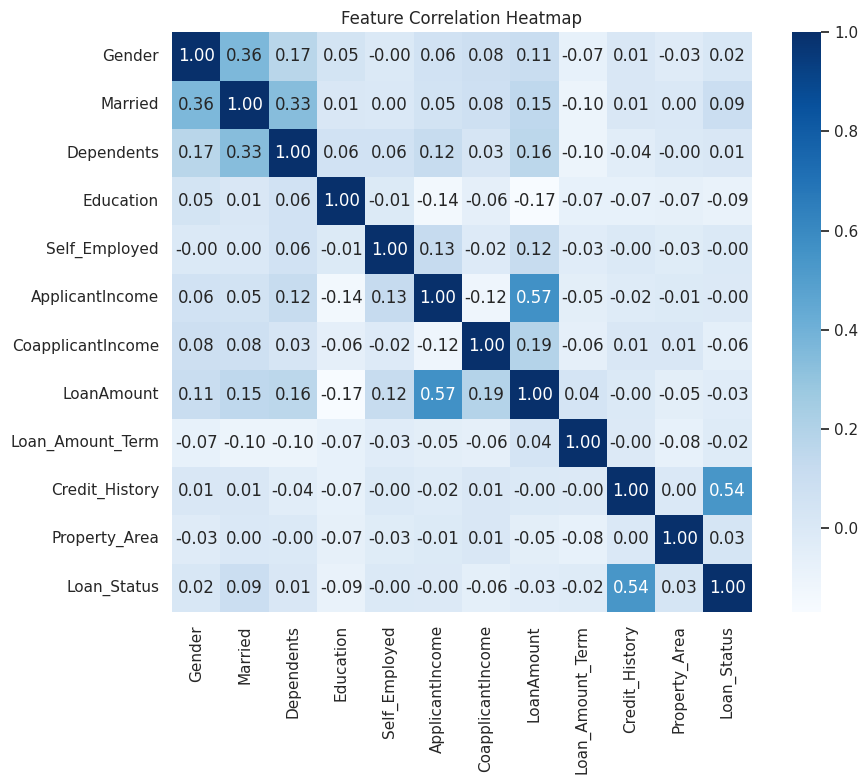

<ipython-input-5-b61a6d0056cd>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


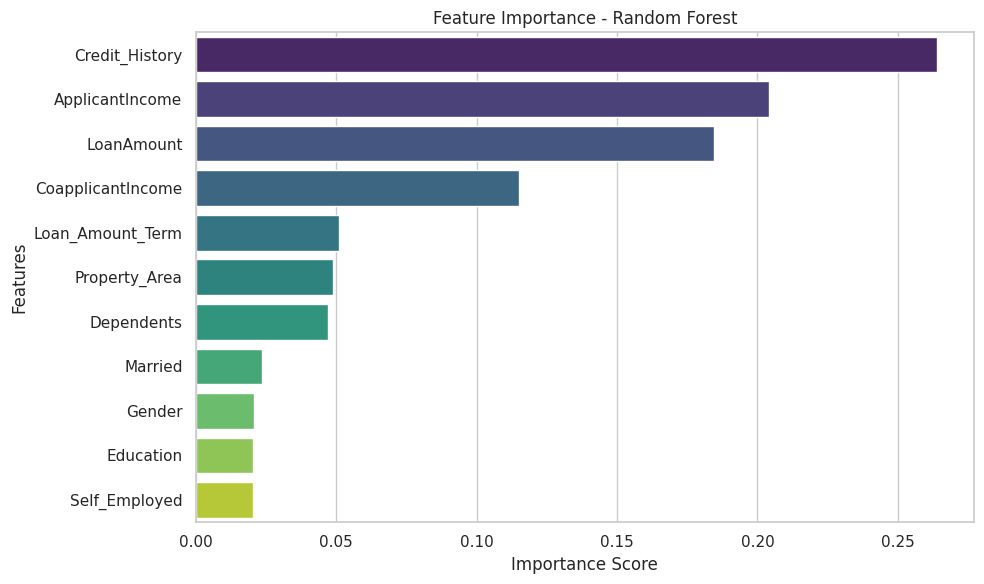

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
train_df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test_df = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

# Add identifier for combining
train_df['is_train'] = 1
test_df['is_train'] = 0
test_df['Loan_Status'] = np.nan

# Combine for preprocessing
combined_df = pd.concat([train_df, test_df], sort=False)

# Fill missing values
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    combined_df[col].fillna(combined_df[col].mode()[0], inplace=True)
combined_df['LoanAmount'].fillna(combined_df['LoanAmount'].median(), inplace=True)

# Encode categorical variables
label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'Loan_Status']
le = LabelEncoder()
for col in label_cols:
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))

# Split back to train and test
train_df_processed = combined_df[combined_df['is_train'] == 1].drop(['is_train', 'Loan_ID'], axis=1)
test_df_processed = combined_df[combined_df['is_train'] == 0].drop(['is_train', 'Loan_ID', 'Loan_Status'], axis=1)

# Features and target
X = train_df_processed.drop("Loan_Status", axis=1)
y = train_df_processed["Loan_Status"]

# Split for training/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_val)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

# Evaluate models
print("Decision Tree Accuracy:", accuracy_score(y_val, dt_preds))
print("Random Forest Accuracy:", accuracy_score(y_val, rf_preds))
print("\nClassification Report (Random Forest):\n", classification_report(y_val, rf_preds))

# === Visualizations ===

# 1. Loan Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Loan_Status', palette='Set2')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. Applicant Income Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=train_df, x='ApplicantIncome', bins=30, kde=True, color='teal')
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3. Loan Amount vs. Loan Status (Boxplot)
plt.figure(figsize=(8, 4))
sns.boxplot(data=train_df, x='Loan_Status', y='LoanAmount', palette='coolwarm')
plt.title("Loan Amount vs. Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.tight_layout()
plt.show()

# 4. Feature Correlation Heatmap
corr = train_df_processed.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# 5. Feature Importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
